In [1]:
#!pip install jupyter notebook
#!pip install tensorflow==1.15
#!pip install keras==2.3

In [2]:
#import os
#os.sys.path
%pwd

'C:\\Users\\tanis\\vision\\FaceRecognition'

In [3]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from PIL.Image import core as _imaging

Using TensorFlow backend.


In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'C:/Users/tanis/vision/FaceRecognition/Datasets/Train'
valid_path = 'C:/Users/tanis/vision/FaceRecognition/Datasets/Datasets/Test'

In [5]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

In [7]:
# useful for getting number of classes
folders = glob('C:/Users/tanis/vision/FaceRecognition/Datasets/Train/*')
  

In [8]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax',input_shape=(1,))(x)


Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [9]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [10]:
#tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)



Instructions for updating:
keep_dims is deprecated, use keepdims instead



In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('C:/Users/tanis/vision/FaceRecognition/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('C:/Users/tanis/vision/FaceRecognition/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

'''r=model.fit_generator(training_set,samples_per_epoch = 8000, nb_epoch = 5, validation_data = test_set, nb_val_samples = 2000)'''

Found 400 images belonging to 4 classes.
Found 335 images belonging to 4 classes.


'r=model.fit_generator(training_set,samples_per_epoch = 8000, nb_epoch = 5, validation_data = test_set, nb_val_samples = 2000)'

In [13]:
# fit the model

r = model.fit_generator(training_set, 
                        validation_data=test_set, 
                        epochs=5, 
                        steps_per_epoch=len(training_set),
                        validation_steps=len(test_set)
                       )



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

Epoch 1/5
13/13 [==============================] - 200s 15s/step - loss: 0.5048 - acc: 0.7815 - val_loss: 4.1265 - val_acc: 0.3582
Epoch 2/5
13/13 [==============================] - 195s 15s/step - loss: 0.0501 - acc: 0.9904 - val_loss: 6.6627 - val_acc: 0.3552
Epoch 3/5
13/13 [==============================] - 188s 14s/step - loss: 0.0229 - acc: 0.9904 - val_loss: 6.8419 - val_acc: 0.3582
Epoch 4/5
13/13 [==============================] - 182s 14s/step - loss: 0.0135 - acc: 1.0000 - val_loss: 6.0140 - val_acc: 0.3582
Epoch 5/5
13/13 [==============================] - 185s 14s/step - loss: 0.0083 - acc: 1.0000 - val_loss: 6.1716 - val_acc: 0.3582


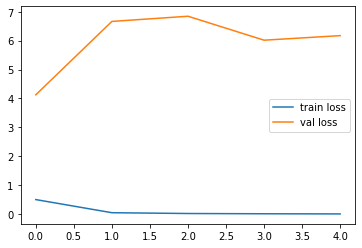

<Figure size 432x288 with 0 Axes>

In [14]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

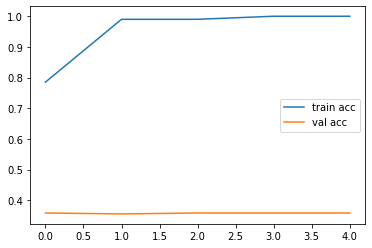

<Figure size 432x288 with 0 Axes>

In [15]:
# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_new_model.xml')